In [6]:
from matplotlib import pyplot as plt

from bitstrings import generate_bitstring, calculate_fitness, crossover, mutate_bitstring
from ga import GA

In [2]:
# Genetic Algorithm parameters
POPULATION_SIZE = 100
MUTATION_RATE = 0.01
GENERATIONS = 1000
LENGTH = 16
PLOT = 5

In [3]:
# scores = bitstrings.genetic_algorithm(GENERATIONS, POPULATION_SIZE, MUTATION_RATE, LENGTH, True)

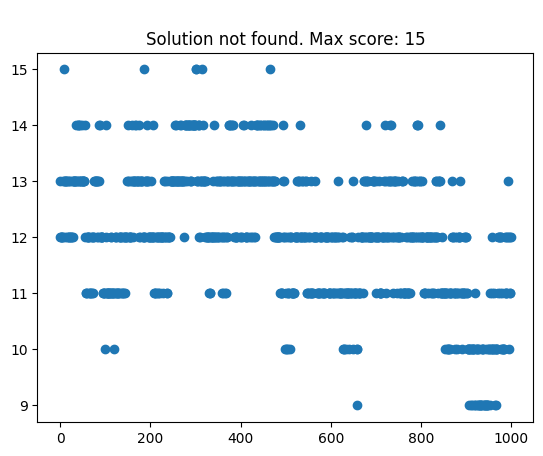



-----------------------------------------------------------------------------------


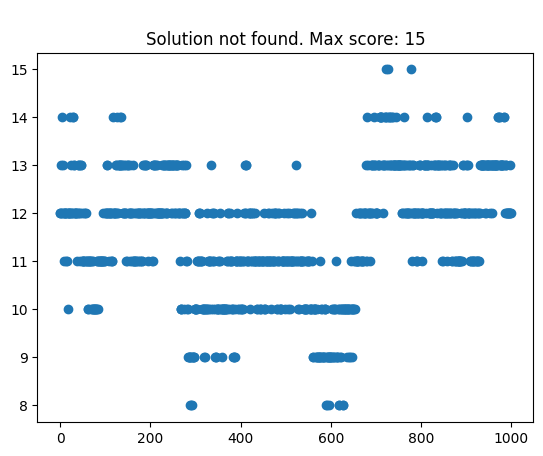



-----------------------------------------------------------------------------------


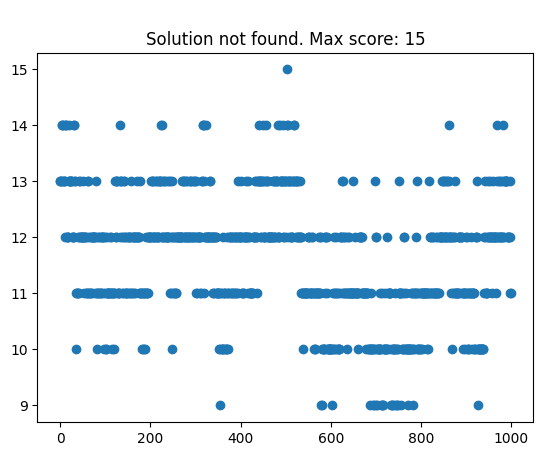



-----------------------------------------------------------------------------------


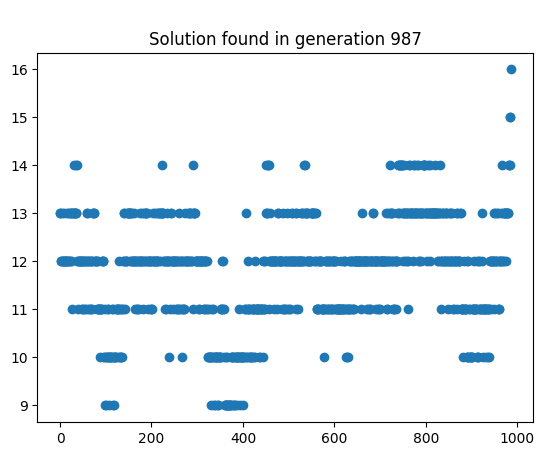



-----------------------------------------------------------------------------------


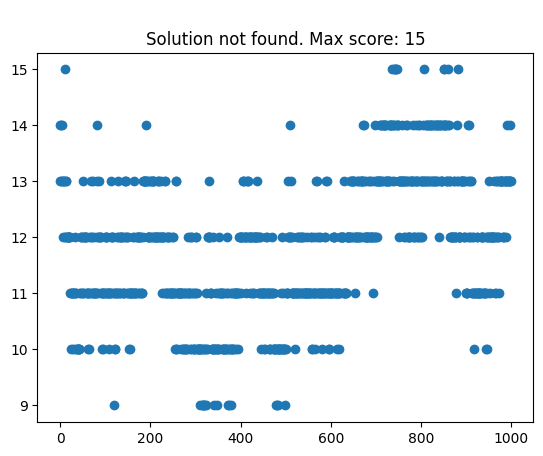

In [7]:
ga_runner = GA(generate_bitstring, calculate_fitness, crossover, mutate_bitstring)
for i in range(PLOT):
    scores = ga_runner.genetic_algorithm(GENERATIONS, POPULATION_SIZE, MUTATION_RATE, LENGTH)
    plt.scatter(range(len(scores)), scores)
    max_score = max(scores)
    if max_score == LENGTH:
        plt.title(f"\nSolution found in generation {len(scores)}")
    else:
        plt.title(f"\nSolution not found. Max score: {max_score}")
    plt.show()
    if i != PLOT - 1:
        print("\n\n-----------------------------------------------------------------------------------")